## Assignment 5 - Deep Learning

Manisha Sathanur
801069595

## I. Overview <br>

The objective of this assignment is to implement a deep network with more than 5 layers using TensorFlow. I have loaded the classification data, partitioned it based on requiremnets, visualized it, trained it and plotted the results. I have used various network structures with various number of nodes in each hidden layers. The layers are analyzed based on various networks. 

__The dataset taken is from kaggle .It consists of reviews of food from amazon. 
 Reviews include product and user information, ratings, and text review.
 Profile names and summary contain null values.
 The output for this data is classification. as we need to classify the data as to which score the custormer would give raging from 1 to 5 with 5 being the most like and 1 being the least liked.__
### Data includes:
- Reviews from Oct 1999 - Oct 2012
- 568,454 reviews
- 256,059 users
- 74,258 products
- 260 users with > 50 reviews
- 
### The data set contains the following fields
 __Id, ProductId, UserId, ProfileName, HelpfulnessNumerator, HelpfulnessDenominator, Score, Time, Summary, Text 
 IdRow Id__
- ProductId: Unique identifier for the product
- UserId: Unqiue identifier for the user
- ProfileName: Profile name of the user
- HelpfulnessNumerator: Number of users who found the review helpful
- HelpfulnessDenominator: Number of users who indicated whether they found the review helpful or not
- ScoreRating: between 1 and 5
- TimeTimestamp: for the review
- Summary: Brief summary of the review
- Text:Text of the review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data from csv file 
review=pd.read_csv("Reviews.csv")
review.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## DATA PRE_PROCESSING
- __Remove special characters from profile name__
- __Remove rows having null for profileName attibute__
- __Remove unnecessary punctuations from text__
- __Remove unnecessary punctuations from Summary__ 

In [3]:
#few columns have '"' in they profilename . replace that with blank space 
review["ProfileName"] = review['ProfileName'].str.replace('"','')

In [4]:
#print cloumns which have missing profile names
null_data = review[review['ProfileName'].isnull()]
print(null_data[['ProfileName','Id','Score']])

       ProfileName      Id  Score
25509          NaN   25510      5
38874          NaN   38875      1
49800          NaN   49801      2
67077          NaN   67078      5
106550         NaN  106551      5
137613         NaN  137614      5
163191         NaN  163192      5
172462         NaN  172463      5
297275         NaN  297276      1
306751         NaN  306752      5
431598         NaN  431599      1
440825         NaN  440826      5
490412         NaN  490413      5
491728         NaN  491729      1
515436         NaN  515437      5
560446         NaN  560447      5


In [5]:
#Remove columns with Nan in profile name
review=review.dropna(subset=['ProfileName'])

In [6]:
review.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName                0
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

## Observations:
__the number of NA values in profile name are now 0 as we have deleted the rows which did not have profile name.__

In [7]:
review["Text_new"] = review['Text'].str.replace('[^\w\s]','')


In [8]:
review["Summary"] = review['Summary'].str.replace('[^\w\s]','')

In [9]:
#remove puntuations from summary
print(review[['Summary']].head(5))

                 Summary
0  Good Quality Dog Food
1      Not as Advertised
2    Delight says it all
3         Cough Medicine
4            Great taffy


In [10]:
review.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName                0
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
Text_new                   0
dtype: int64

__The number of rows that have NA is summary is 27. As having null in Summary might not effect the analysis much  so we can continue__

## Visualisation

Text(0.5,1,'Distribution of Review Score')

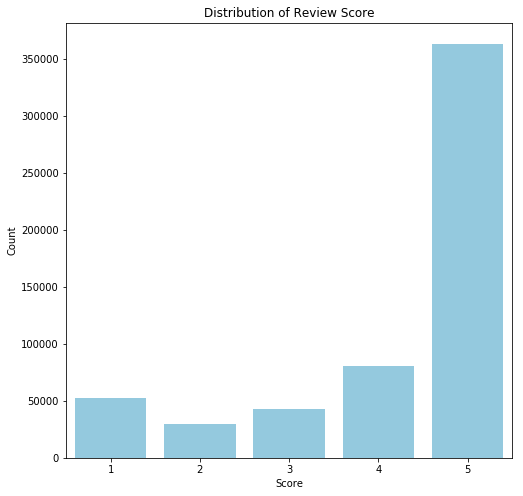

In [11]:
plt.figure(figsize=(8,8))
ax=sns.countplot(review['Score'],color='skyblue')
ax.set_xlabel("Score")
ax.set_ylabel('Count')
ax.set_title("Distribution of Review Score")

## Observations :
__maximum number of users have given a rating of 5. This pattern could be because of human tendecy to just rate 5 by default.
To know the score along with the usefulness we need to perform more visualisations using Helpfullness along with the score.__

In [12]:
# Create a list containing the average usefulness for given ratings
use_ls = []

for i in range(1, 6):
    use_ls.append([i, np.sum(review[review.Score == i].HelpfulnessDenominator) / np.sum([review.Score == i])])
    
use_arr = np.asarray(use_ls)

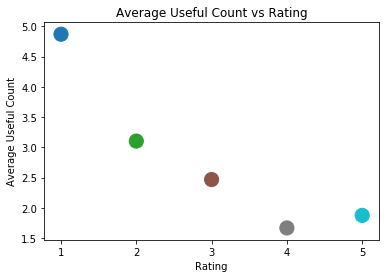

In [13]:
plt.scatter(use_arr[:, 0], use_arr[:, 1], c=use_arr[:, 0], cmap='tab10', s=200)
plt.title('Average Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Useful Count')
plt.xticks([i for i in range(1, 6)]);

## Observation:
__it can be noted that there are many users who found review score 1 more helpful.
could be that such reviews might have helped them to avoid a particular food.__

### top 5 persons whose reviews people have found most reviews.

In [14]:
useful=review.groupby('ProfileName')['HelpfulnessDenominator'].mean().reset_index().sort_values('HelpfulnessDenominator',ascending=False)

[Text(0,0,'BabbChuck BabbChuck'),
 Text(0,0,'P. Schmidt'),
 Text(0,0,'Benjamin Chodroff'),
 Text(0,0,'R. Hiltz'),
 Text(0,0,'ic ic')]

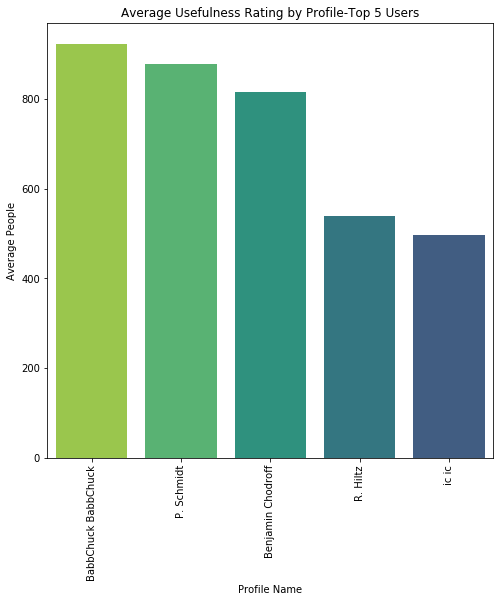

In [15]:
plt.figure(figsize=(8,8))
ax=sns.barplot(x='ProfileName',y='HelpfulnessDenominator',data=useful[:5],palette=sns.color_palette(palette="viridis_r"))
ax.set_title("Average Usefulness Rating by Profile-Top 5 Users")
ax.set_xlabel("Profile Name")
ax.set_ylabel("Average People")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


## Observations
__user profile named BabbChunk has given the highest number of usefull ratings followed by P. Schmidt, Benjamin Chodroff, R.Hiitz and ic.__

### people who have given the most positive reviews

In [16]:
scores=review.groupby('ProfileName')['Score'].mean().reset_index().sort_values(by='Score',ascending=False)
scores.head()

,ProfileName,Score
109191,M. Field,5.0
125959,MyMarineRox,5.0
125946,MyB,5.0
125947,MyBB,5.0
125950,MyDogRunsMyLife,5.0


[Text(0,0,'M. Field'),
 Text(0,0,'MyMarineRox'),
 Text(0,0,'MyB'),
 Text(0,0,'MyBB'),
 Text(0,0,'MyDogRunsMyLife'),
 Text(0,0,'MyDogsBestFriend DonnaJean  McWhite'),
 Text(0,0,'MyGrnEyesF'),
 Text(0,0,'MyHumbleOpinion'),
 Text(0,0,'MyLoveIsBlind'),
 Text(0,0,'MyMelange')]

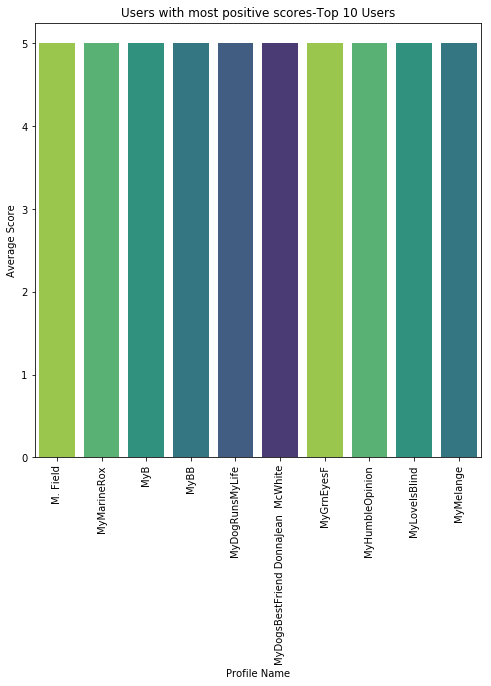

In [17]:
plt.figure(figsize=(8,8))
ax=sns.barplot(x='ProfileName',y='Score',data=scores[:10],palette=sns.color_palette(palette="viridis_r"))
ax.set_title("Users with most positive scores-Top 10 Users")
ax.set_xlabel("Profile Name")
ax.set_ylabel("Average Score")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) # rotates the names by 90

## Observation: 
__The plot tells us that on an average most of the users have written positive reviews__

## __Preparing data with required feilds for classification__

In [18]:
df=review
df.loc[:, 'Helpful'] = np.where(df.loc[:, 'HelpfulnessNumerator'] / df.loc[:, 'HelpfulnessDenominator'] > 0.50, 1, 0)
df.head(10)
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
Text_new                  object
Helpful                    int32
dtype: object

In [19]:
df['review_length']=df['Text_new'].str.len()
df.dropna(inplace=True)
df[df['Score'] != 3]
df['Positivity'] = np.where(df['Score'] > 3, 1, -1)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_new,Helpful,review_length,Positivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...,1,260,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...,0,183,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,Natalia Corres Natalia Corres,1,1,4,1219017600,Delight says it all,This is a confection that has been around a fe...,This is a confection that has been around a fe...,1,491,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,1,214,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,Michael D. Bigham M. Wassir,0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy at a great price There was a wide...,0,135,1


__As the data is very huge . We can take a sample of 10000 from the original data set.__

In [20]:
dataset=df.sample(12000)

In [40]:
target=dataset.iloc[:,-1]
features=dataset.drop(['Positivity','Text_new','Text','Score','Id','ProductId','Summary','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator'],axis=1)
#features=X_train_vectorized.toarray()
#features.shape
target.shape

(12000,)

In [66]:
target=np.array(target)
target=target.reshape(12000,1)
target.shape

(12000, 1)

In [74]:
target = pd.DataFrame(target) 
type(target)

pandas.core.frame.DataFrame

In [75]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [76]:
# Testing and Training sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=40)

In [77]:
target_train.shape

(8400, 1)

In [78]:
target_test.shape

(3600, 1)

In [87]:
type(features_train)

pandas.core.frame.DataFrame

In [146]:
nTrain = (target_train+1)%2
newTrain = (nTrain.T.append(target_train.T)).T
newTrain.shape

(8400, 2)

In [147]:
nTest = (target_test+1)%2
newTest = (nTest.T.append(target_test.T)).T
newTest.shape

(3600, 2)

## Explanation of the choice for 3 different neural network structures and reason for the selection

The input layer consists of various 3 units i.e., number of features . Output layer consists of 2 units i.e -1 or 1..  We will be checking this problem with 5, 6 and 7 hidden layers.The values for the hidden layers are taken as increasing, decreasing and then increasing and the final network is constructed with random values. I have done this in order to understand how my data would behave when under various nymber of hidden layers 



### Network1

we construct he first network with 5 hidden layers. We have gradually decreased the  number of nodes in each layer from input to output. The first, second, third, fourth and fifth hidden layers consists of 14, 12, 10, 8, 6 units respectively. . Here, the input features are gradually generalized and each consecutive layer comes up with fewer units. At the end, we will end up with output layer with 2 units.

In [82]:
import tensorflow as tf

In [83]:
import numpy
numpy.version.version

'1.16.2'

In [173]:
#Defining network
def network1(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['hid1']), biases['bias1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    layer_2 = tf.add(tf.matmul(layer_1, weights['hid2']), biases['bias2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_2 = tf.nn.dropout(layer_2, keep_prob)
    layer_3 = tf.add(tf.matmul(layer_2, weights['hid3']), biases['bias3'])
    layer_3 = tf.nn.relu(layer_3)
    layer_3 = tf.nn.dropout(layer_3, keep_prob)
    layer_4 = tf.add(tf.matmul(layer_3, weights['hid4']), biases['bias4'])
    layer_4 = tf.nn.relu(layer_4)
    layer_4 = tf.nn.dropout(layer_4, keep_prob)
    layer_5 = tf.add(tf.matmul(layer_4, weights['hid5']), biases['bias5'])
    layer_5 = tf.nn.relu(layer_5)
    layer_5 = tf.nn.dropout(layer_5, keep_prob)
    output_layer = tf.matmul(layer_5, weights['out']) + biases['out']
    return output_layer

In [174]:
features_train.shape

(8400, 3)

In [175]:
#Initializing number of units for each layer
n_hidden_1 = 14
n_hidden_2 = 12
n_hidden_3 = 10
n_hidden_4 = 8
n_hidden_5 = 6
n_input =features_train.shape[1]
n_classes = newyTrain.shape[1]
#Initializing Weights with random values
weights = {
    'hid1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'hid2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'hid3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'hid4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'hid5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_hidden_5, n_classes]))
}
#Initializing biases with random values
biases = {
    'bias1': tf.Variable(tf.random_normal([n_hidden_1])),
    'bias2': tf.Variable(tf.random_normal([n_hidden_2])),
    'bias3': tf.Variable(tf.random_normal([n_hidden_3])),
    'bias4': tf.Variable(tf.random_normal([n_hidden_4])),
    'bias5': tf.Variable(tf.random_normal([n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

keep_prob = tf.placeholder("float")

In [176]:
training_epochs = 50
view = 10
batch_size = 64

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [177]:
predictions = network1(x, weights, biases, keep_prob)

In [178]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y)) 

In [179]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost) # Using Adamoptimizer

Epoch:  1 cost= 6825966308.39694786
Epoch: 11 cost= 303860508.49004620
Epoch: 21 cost= 60999452.07957855
Epoch: 31 cost= 10649126.14689588
Epoch: 41 cost= 9608039.61076492
Optimization Finished!
Accuracy: 0.77944446


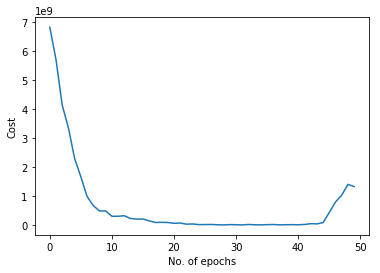

In [180]:
# Session block
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    epochcost = np.zeros(training_epochs)
    accuracyarray = np.zeros(training_epochs)
    for epoch in range(training_epochs):
        avg_cost = 0.0
        partitions = int(len(features_train) / batch_size)
        # Create batches of data
        x_batches = np.array_split(features_train, partitions)
        y_batches = np.array_split(newTrain, partitions)
        for i in range(partitions):
            batch_x, batch_y = x_batches[i], y_batches[i]
            _, c = sess.run([optimizer, cost], 
                            feed_dict={
                                x: batch_x, 
                                y: batch_y, 
                                keep_prob: 0.8
                            })
            avg_cost += c / partitions
        #Displaying for n epochs
        if epoch % view == 0:
            print("Epoch:", '%2d' % (epoch+1), "cost=", \
                "{:.8f}".format(avg_cost))
        #Store cost value for each epoch
        epochcost[epoch] = avg_cost
        correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
        #Store cost value for each epoch
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        accuracyarray[epoch] =  accuracy.eval({x: features_test, y: newTest, keep_prob: 1.0})
    print("Optimization Finished!")
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: features_test, y: newTest, keep_prob: 1.0}))
    #Display cost graph
    plt.plot(epochcost)
    plt.xlabel('No. of epochs')
    plt.ylabel('Cost')

Text(0,0.5,'Accuracy')

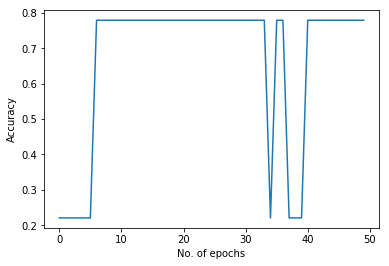

In [181]:
#Display accuracy graph
plt.plot(accuracyarray)
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')

### Network2

We construct the second network with the number of nodes are initially increased until the middle of the network and then gradually decreased.
The first, second, third, fourth, fifth and sixth hidden layers consists of 24, 26, 24, 20, 16 and 4 units respectively. This is to be done when we have very less features. If we assume the middle layer to be input layer, observe from the middle of the network, it looks similar to the first network with decreasing units in each layer. So, the number of features are increased so that we can have better data which results in a good model.

In [130]:
def network2(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['hid1']), biases['bias1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    layer_2 = tf.add(tf.matmul(layer_1, weights['hid2']), biases['bias2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_2 = tf.nn.dropout(layer_2, keep_prob)
    layer_3 = tf.add(tf.matmul(layer_2, weights['hid3']), biases['bias3'])
    layer_3 = tf.nn.relu(layer_3)
    layer_3 = tf.nn.dropout(layer_3, keep_prob)
    layer_4 = tf.add(tf.matmul(layer_3, weights['hid4']), biases['bias4'])
    layer_4 = tf.nn.relu(layer_4)
    layer_4 = tf.nn.dropout(layer_4, keep_prob)
    layer_5 = tf.add(tf.matmul(layer_4, weights['hid5']), biases['bias5'])
    layer_5 = tf.nn.relu(layer_5)
    layer_5 = tf.nn.dropout(layer_5, keep_prob)
    layer_6 = tf.add(tf.matmul(layer_5, weights['hid6']), biases['bias6'])
    layer_6 = tf.nn.relu(layer_6)
    layer_6 = tf.nn.dropout(layer_6, keep_prob)
    output_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return output_layer

In [131]:
n_hidden_1 = 24
n_hidden_2 = 26
n_hidden_3 = 24
n_hidden_4 = 20
n_hidden_5 = 16
n_hidden_6 = 4
n_input = features_train.shape[1]
n_classes = newyTrain.shape[1]

weights = {
    'hid1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'hid2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'hid3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'hid4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'hid5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
    'hid6': tf.Variable(tf.random_normal([n_hidden_5, n_hidden_6])),
    'out': tf.Variable(tf.random_normal([n_hidden_6, n_classes]))
}

biases = {
    'bias1': tf.Variable(tf.random_normal([n_hidden_1])),
    'bias2': tf.Variable(tf.random_normal([n_hidden_2])),
    'bias3': tf.Variable(tf.random_normal([n_hidden_3])),
    'bias4': tf.Variable(tf.random_normal([n_hidden_4])),
    'bias5': tf.Variable(tf.random_normal([n_hidden_5])),
    'bias6': tf.Variable(tf.random_normal([n_hidden_6])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

keep_prob = tf.placeholder("float")

In [153]:
training_epochs = 50
view = 10
batch_size = 64

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [154]:
predictions = network2(x, weights, biases, keep_prob)

In [155]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))

In [156]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

Epoch:  1 cost= 30276385600.48854446
Epoch: 11 cost= 2470740191.36166716
Epoch: 21 cost= 479841974.06474471
Epoch: 31 cost= 329732419.33703578
Epoch: 41 cost= 1664310680.94793034
Optimization Finished!
Accuracy: 0.22055556


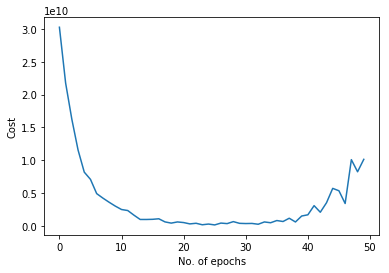

In [157]:
# Session block
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    epochcost = np.zeros(training_epochs)
    accuracyarray = np.zeros(training_epochs)
    for epoch in range(training_epochs):
        avg_cost = 0.0
        partitions = int(len(features_train) / batch_size)
        # Create batches of data
        x_batches = np.array_split(features_train, partitions)
        y_batches = np.array_split(newTrain, partitions)
        for i in range(partitions):
            batch_x, batch_y = x_batches[i], y_batches[i]
            _, c = sess.run([optimizer, cost], 
                            feed_dict={
                                x: batch_x, 
                                y: batch_y, 
                                keep_prob: 0.8
                            })
            avg_cost += c / partitions
        #Displaying for n epochs
        if epoch % view == 0:
            print("Epoch:", '%2d' % (epoch+1), "cost=", \
                "{:.8f}".format(avg_cost))
        #Store cost value for each epoch
        epochcost[epoch] = avg_cost
        correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
        #Store cost value for each epoch
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        accuracyarray[epoch] =  accuracy.eval({x: features_test, y: newTest, keep_prob: 1.0})
    print("Optimization Finished!")
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: features_test, y: newTest, keep_prob: 1.0}))
    #Display cost graph
    plt.plot(epochcost)
    plt.xlabel('No. of epochs')
    plt.ylabel('Cost')

In [ ]:
plt.plot(accuracyarray)
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')

### Network3
Here, the number of units in each layer are not gradually decreasing. Instead they are in a zigzag from. One of the reason is that decreasing numbers of hidden units force generalization and reduce the accuracy of the model. The first, second, third, fourth, fifth, sixth and seventh hidden layers consists of 8, 4, 8, 4, 8, 4 and 2 respectively. Here, even we have increased the number of layers to 7 and the average number of units in each layer is 6. This is to check whether the accuracy increases with increase in number of layers.

In [109]:
def network3(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['hid1']), biases['bias1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    layer_2 = tf.add(tf.matmul(layer_1, weights['hid2']), biases['bias2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_2 = tf.nn.dropout(layer_2, keep_prob)
    layer_3 = tf.add(tf.matmul(layer_2, weights['hid3']), biases['bias3'])
    layer_3 = tf.nn.relu(layer_3)
    layer_3 = tf.nn.dropout(layer_3, keep_prob)
    layer_4 = tf.add(tf.matmul(layer_3, weights['hid4']), biases['bias4'])
    layer_4 = tf.nn.relu(layer_4)
    layer_4 = tf.nn.dropout(layer_4, keep_prob)
    layer_5 = tf.add(tf.matmul(layer_4, weights['hid5']), biases['bias5'])
    layer_5 = tf.nn.relu(layer_5)
    layer_5 = tf.nn.dropout(layer_5, keep_prob)
    layer_6 = tf.add(tf.matmul(layer_5, weights['hid6']), biases['bias6'])
    layer_6 = tf.nn.relu(layer_6)
    layer_6 = tf.nn.dropout(layer_6, keep_prob)
    layer_7 = tf.add(tf.matmul(layer_6, weights['hid7']), biases['bias7'])
    layer_7 = tf.nn.relu(layer_7)
    layer_7 = tf.nn.dropout(layer_7, keep_prob)

    output_layer = tf.matmul(layer_7, weights['out']) + biases['out']
    return output_layer

In [111]:
n_hidden_1 = 8
n_hidden_2 = 4
n_hidden_3 = 8
n_hidden_4 = 4
n_hidden_5 = 8
n_hidden_6 = 4
n_hidden_7 = 2
n_input = features_train.shape[1]
n_classes = newyTrain.shape[1]

weights = {
    'hid1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'hid2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'hid3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'hid4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'hid5': tf.Variable(tf.random_normal([n_hidden_4, n_hidden_5])),
    'hid6': tf.Variable(tf.random_normal([n_hidden_5, n_hidden_6])),
    'hid7': tf.Variable(tf.random_normal([n_hidden_6, n_hidden_7])),
    'out': tf.Variable(tf.random_normal([n_hidden_7, n_classes]))
}

biases = {
    'bias1': tf.Variable(tf.random_normal([n_hidden_1])),
    'bias2': tf.Variable(tf.random_normal([n_hidden_2])),
    'bias3': tf.Variable(tf.random_normal([n_hidden_3])),
    'bias4': tf.Variable(tf.random_normal([n_hidden_4])),
    'bias5': tf.Variable(tf.random_normal([n_hidden_5])),
    'bias6': tf.Variable(tf.random_normal([n_hidden_6])),
    'bias7': tf.Variable(tf.random_normal([n_hidden_7])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

keep_prob = tf.placeholder("float")

In [112]:
training_epochs = 50
view = 10
batch_size = 64

x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [113]:
predictions = network3(x, weights, biases, keep_prob)

In [114]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))

In [115]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)

Epoch:  1 cost= 90697386589.80151367
Epoch: 11 cost= 24224952761.16031265
Epoch: 21 cost= 3555664904.13422298
Epoch: 31 cost= 5322153389.00027275
Epoch: 41 cost= 7683076553.28040886
Optimization Finished!
Accuracy: 0.77944446


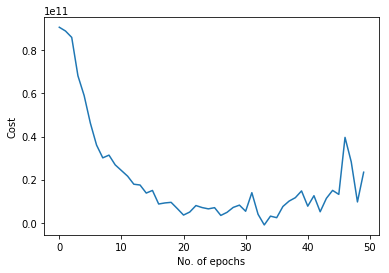

In [150]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    epochcost = np.zeros(training_epochs)
    accuracyarray = np.zeros(training_epochs)
    for epoch in range(training_epochs):
        avg_cost = 0.0
        partitions = int(len(features_train) / batch_size)
        x_batches = np.array_split(features_train, partitions)
        y_batches = np.array_split(newTrain, partitions)
        for i in range(partitions):
            batch_x, batch_y = x_batches[i], y_batches[i]
            _, c = sess.run([optimizer, cost], 
                            feed_dict={
                                x: batch_x, 
                                y: batch_y, 
                                keep_prob: 0.8
                            })
            avg_cost += c / partitions
        if epoch % view == 0:
            print("Epoch:", '%2d' % (epoch+1), "cost=", \
                "{:.8f}".format(avg_cost))
        epochcost[epoch] = avg_cost
        correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        accuracyarray[epoch] =  accuracy.eval({x: features_test, y: newTest, keep_prob: 1.0})
    print("Optimization Finished!")
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: features_test, y: newTest, keep_prob: 1.0}))
    plt.plot(epochcost)
    plt.xlabel('No. of epochs')
    plt.ylabel('Cost')

Text(0,0.5,'Accuracy')

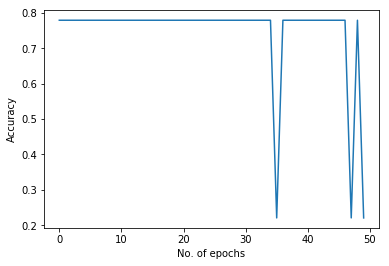

In [158]:
plt.plot(accuracyarray)
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')

## Explanation of codes for each structure

In three of the cases, at first the network is created with required number of layers. And then weights and biases are randomly initialized. Training epochs and batch size is initialized. At each network, code is explained in comments.

### Network1
AdamOptimizer is used. The number of units for each hidden layer from 1 to 5 are initiated and the the session is started. Layers are initiated by multiplying the weights with the previous layer.

### Network2
Learning rate is also initialized. It is same for three of the networks. The number of epochs, optimizer and learning rate is kept constant so that we can examine the results based on just the network. Data is divided based on the batch size. Arrays are initiated to store values of accuracy and cost for each epoch. These are updated during each epoch

### Network3
Instead of calculating the accuracy at the end, cost and accuracy are calculated for each epoch and plotted. The plots are analysed and a detailed description of them is given. Cost is displayed based on display step. 

## Explanation of experimental codes



Based on the intiated values, some networks are behaviouris slightly different  when executed multiple times. There is a change in the results when we re run the code. Hence, while implementing these codes, the exact results may not be reproduced. The learning is also changing for each network based on this. Data is partitioned based on various conditions and different visualizations are done. Matplotlib is used to plot these visualizations. Xlabel and Ylabel attributes are used to display the axis names.

## Plots for Results

The plot for number of epochs vs cost is plotted for 3 networks while implementing them itself. We can observe that the cost is lesser for the 3rd network with 7 layers with a few epochs itself. In every network, the cost is decreasing with increase in iterations. Similarly, with increase in number of epochs, the accuracy has been increasing to an extent and after some optimum value it is not increasing. We can observe third network is performing very well in No. of epochs vs Accuracy graph also.



## Discussions about the choice of network structures

The number of layers in first, second and third network are 5, 6 and 7 respectively. These are selected to inspect the change in accuracy with increase in number of hidden layers. In the first network, the number of units in each hidden layer from input to output are gradually decreasing. In the second network, the number of nodes are initially increased until the middle of the network and then gradually decreased. In the third network, the number of units in each layer are in zigzag form. Number of nodes are increased, immediately decreased and then again increased. Values are stored using numpy arrays at each iteration and then they are plot using matplotlib libraries.<br>
All the 3 networks have performed with a good accuracy of close to 78%. But the model with 7 layers is learning quickly. Though after some epochs, all the models are performing similarly. 

## Conclusion:

The accuracy for the various networks with different number of hidden layers and the pattern of the values is almost the same.
The classification shows an acuuracy close to 78%.

- I have learnt a lot about the library tensorflow, its functions and implementation.
- I learnt about the influence of various parameters and learning rate on predicting results
- Working with higher number of levels and choosing nodes for each level has been both challenging and timetaking
    